# Introduction à l'IA
##TD_3I-SI4 : Algorithmes évolutionnaires

## ILYAS GHANDAOUI E3FI 1I

### 1) Choix d’un emplacement pour une caserne de pompier
On cherche à trouver un bon emplacement pour une caserne de pompier afin de minimiser le temps
d’intervention en moyenne. Une étude a été faite sur les interventions passées l’année précédente.
Le résultat de cette étude est donné à la figure 1. Cette matrice représente un quadrillage de la ville
en zones d’un kilomètre carré. Chaque cellule reporte le nombre d’interventions sur la zone.
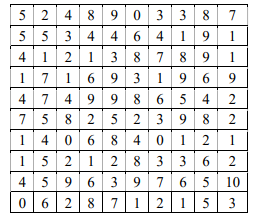

On souhaite trouver une solution à ce problème à l’aide d’un algorithme évolutionnaire.


### Question 1.1 : Définir un individu pour ce problème ainsi qu’une méthode pour générer aléatoirement n’importe quel individu possible.

Réponse :

Un individu à une position qui un est un couple de valeurs (X,Y) dans une matrice 2D

X, et Y peuvent prendre des valeurs de 0 à 9 soit 100 couples X,Y possibles

Pour générer un individu à une position aléatoire , on génère pour X et Y un nombre aléatoire entre 0 et 9



In [1]:
import numpy as np
import random

matrice_interventions = np.array([
    [5, 2, 4, 8, 9, 0, 3, 3, 8, 7],
    [5, 5, 3, 4, 4, 6, 4, 1, 9, 1],
    [4, 1, 2, 1, 3, 8, 7, 8, 9, 1],
    [1, 7, 1, 6, 9, 3, 1, 9, 6, 9],
    [4, 7, 4, 9, 9, 8, 6, 5, 4, 2],
    [7, 5, 8, 2, 5, 2, 3, 9, 8, 2],
    [1, 4, 0, 6, 8, 4, 0, 1, 2, 1],
    [1, 5, 2, 1, 2, 8, 3, 3, 6, 2],
    [4, 5, 9, 6, 3, 9, 7, 6, 5, 10],
    [0, 6, 2, 8, 7, 1, 2, 1, 5, 3]
])
hauteur, largeur = matrice_interventions.shape
total_operations = matrice_interventions.sum()

class Individu:
    def __init__(self, x=None, y=None):
        self.x = x if x is not None else random.randint(0, largeur - 1)
        self.y = y if y is not None else random.randint(0, hauteur - 1)
        self.adaptation = 0


### Question 1.2 : Définir une fonction de coût d’un individu permettant d’en évaluer l’intérêt

réponse :
La fonction de coût est la somme des distances d'un point de coordonées (X,Y) à toutes les cellules de la matrice pondérées par le nombre d'intervention

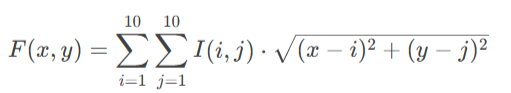

Soit F(x,y) qui représente le coût total pour la position (X,Y).

I(X,Y) correspond au nombre d'intervention ( le poids de la cellule)

la position optimale serait la position dont le resultat de la fonction cout serait la plus faible .

Une façon optimisée serait de faire la dérivé partielle et utilisé la decente de gradiant


Ce code calcule un cout pour un individu avec ses coordonnées X et Y.

In [2]:
    def calculer_adaptation(self):
        j, i = np.meshgrid(np.arange(largeur), np.arange(hauteur))
        distances = np.sqrt((self.x - j) ** 2 + (self.y - i) ** 2)
        cout_total = np.sum(matrice_interventions * distances)

        print(f"cout total: {cout_total}")
        self.adaptation = cout_total / total_operations
        return self.adaptation

### Question 1.3 : Définir un opérateur de croisement entre individus.

Réponse:

Échanger les coordonnées entre deux parents.

Plusieurs methodes sont possible, j'ai chosit
de permuter dans dans l'enfant 1 ( Y du parent 1 par Y du parent 2)
et l'inverse pour l'enfant 2.

Nous aurions pu faire de même avec X.






Ce code permute les coordoné Y du parent 1 avec celle du parent 2 .

In [3]:
def croisement(parent1, parent2):
    """crée deux enfants par échange de coordonnées (Y1 et Y2)"""
    enfant1 = Individu(parent1.x, parent2.y)
    enfant2 = Individu(parent2.x, parent1.y)
    return enfant1, enfant2


### Question 1.4 : Proposer un opérateur de mutation

Réponse:

Pour un individu représenté par un couple (X,Y) D'entier de 0 à 9, l’opérateur de mutation consiste à modifier certaines composantes du vecteur en X ou Y ajoutant un bruit.

On ajoute une valeurs aléatoire entre (-1,1) à x ou Y avec une probabilité / 2 par défaut fixé à 0,7




In [4]:
def mutation(individu, prob_mutation=0.7):
    # Mutation de x avec probabilité prob_mutation/2
    if random.random() < prob_mutation / 2:
        individu.x = np.clip(individu.x + random.choice([-1, 1]), 0, largeur - 1)

    # Mutation de y avec probabilité prob_mutation/2
    if random.random() < prob_mutation / 2:
        individu.y = np.clip(individu.y + random.choice([-1, 1]), 0, hauteur - 1)

    return individu

Implémentation de l'algorithme évolutionnaire qui utilise les fonction implémenté pour determiner la position idéale de la caserne

In [7]:
import numpy as np
import random

matrice_interventions = np.array([
    [5, 2, 4, 8, 9, 0, 3, 3, 8, 7],
    [5, 5, 3, 4, 4, 6, 4, 1, 9, 1],
    [4, 1, 2, 1, 3, 8, 7, 8, 9, 1],
    [1, 7, 1, 6, 9, 3, 1, 9, 6, 9],
    [4, 7, 4, 9, 9, 8, 6, 5, 4, 2],
    [7, 5, 8, 2, 5, 2, 3, 9, 8, 2],
    [1, 4, 0, 6, 8, 4, 0, 1, 2, 1],
    [1, 5, 2, 1, 2, 8, 3, 3, 6, 2],
    [4, 5, 9, 6, 3, 9, 7, 6, 5, 10],
    [0, 6, 2, 8, 7, 1, 2, 1, 5, 3]
])
hauteur, largeur = matrice_interventions.shape
total_operations = matrice_interventions.sum()

class Individu:
    def __init__(self, x=None, y=None):
        self.x = x if x is not None else random.randint(0, largeur - 1)
        self.y = y if y is not None else random.randint(0, hauteur - 1)
        self.adaptation = 0

    def calculer_adaptation(self):
          j, i = np.meshgrid(np.arange(largeur), np.arange(hauteur))
          distances = np.sqrt((self.x - j) ** 2 + (self.y - i) ** 2)
          cout_total = np.sum(matrice_interventions * distances)

          print(f"cout total: {cout_total}")
          self.adaptation = cout_total / total_operations
          return self.adaptation

def algorithme_evolutionnaire():
    taille_population = 5999
    population = [Individu() for _ in range(taille_population)]
    meilleur_historique = None
    generation = 0

    while True:
        # évaluation de l'adaptation
        for individu in population:
            individu.calculer_adaptation()
        # tri par performance
        population.sort(key=lambda x: x.adaptation)
        meilleur_actuel = population[0]

        # Condition d'arrêt
        if meilleur_historique and np.linalg.norm([meilleur_actuel.x - meilleur_historique.x,
                                                   meilleur_actuel.y - meilleur_historique.y]) <= 0.001:
            print(f"Convergence à la génération {generation}")
            break

        meilleur_historique = meilleur_actuel
        # Sélection des meilleurs (20%)
        selectionnes = population[:int(taille_population * 0.2)]
        print(selectionnes)
        # Reproduction
        descendants = []
        while len(descendants) < taille_population - len(selectionnes):
            p1, p2 = random.choices(selectionnes, k=2)
            e1, e2 = croisement(p1, p2)
            descendants.append(mutation(e1))
            descendants.append(mutation(e2))

        population = selectionnes + descendants[:taille_population - len(selectionnes)]
        generation += 1

    return meilleur_historique

solution_optimale = algorithme_evolutionnaire()
print(f"Position optimale: ({solution_optimale.x}, {solution_optimale.y})")
print(f"Coût moyen: {solution_optimale.adaptation:.2f} km/intervention")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.5371384610446
cout total: 1912.537138

Conclusion:

La position optimale de la caserne est

Position optimale: (5, 4)
Coût moyen: 3.70 km/intervention



## 2 Le problème des 8 reines
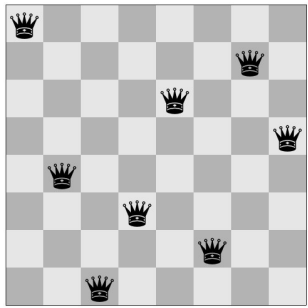

Le but est de réussir à placer 8 reines sur un échiquier de 8 cases sur 8 cases de telle façon à
ce qu’aucune reine ne puisse en attaquer directement une autre.
Une reine est attaquée si sur sa ligne, sa colonne ou ses diagonales une autre reine est présente.


### Question 2.1 : Définir un individu pour ce problème ainsi qu’une méthode pour générer aléatoirement n’importe quel individu possible.

Réponse:

Un individu est représenté par un tableau de taille 8, où chaque élément (indice = colonne) indique la ligne de la reine (0 à 7).

Exemple : [3, 1, 4, 0, 6, 2, 5, 7].

On peut créer une permutation aléatoire des nombres 0 à 7.
 Cela garantit une reine par colonne et ligne, mais pas nécessairement sans conflits diagonaux.

Si dans la liste il y a des doublon c’est que sur une colonne il y a un conflit




In [9]:
import random
def generate_random_individual():
    """cree  un individu valide (permutation des chiffres 1 à 8)"""
    return random.sample(range(1, 9), 8)

### Question 2.2 : Définir une fonction de coût d’un individu permettant d’en évaluer l’intérêt.

réponse:

La fonction de coût compte le nombre de conflits diagonaux entre les reines. Pour chaque paire de reines

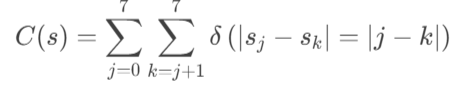

Avec :  

J et k des indices de collones sur l'échiquier de 0 à 7

Sj et Sk les lignes où sont placé les reines


Dans la liste [6, 3, 1, 8, 5, 2, 4, 7]:
j = 0 et k = 7
Sj vaudra 6 et Sk vaudra 7

Le But de sera de minimiser (C(s)=0) cette fonction cout, pour avoir 0 conflits.


Une façon optimisée serait de faire la dérivé partielle et utilisé la decente de gradiant



In [8]:
def cost_function(individual):
    """Calcule nb conflits dans l'individu"""
    conflicts = 0
    n = len(individual)

    for i in range(n):
        for j in range(i + 1, n):
            if abs(individual[i] - individual[j]) == abs(i - j):
                conflicts += 1

    return conflicts

### Question 2.3 : Définir un opérateur de croisement entre individus.

réponse:

Pour croisé deux individus de 8 collones serait:

Diviser chaque parents en trois partie :  
les 4 premiere valeurs,
les 2 suivantes,
et les 4 derniére.

Ensuite swap des segment des deux parent avec q'une probabilité de 0,5.

d'autre methode aurait pu étre implémenté .




In [10]:
def crossover(parent1, parent2):

    #découpage en segments
    seg_p1_1 = parent1[:3]
    seg_p1_2 = parent1[3:5]
    seg_p1_3 = parent1[5:]

    seg_p2_1 = parent2[:3]
    seg_p2_2 = parent2[3:5]
    seg_p2_3 = parent2[5:]

    #sélection aléatoire des segments (segment 2 inversé)
    segment1 = seg_p1_1 if random.random() < 0.5 else seg_p2_1
    segment2 = seg_p1_2[::-1] if random.random() < 0.5 else seg_p2_2[::-1]
    segment3 = seg_p1_3 if random.random() < 0.5 else seg_p2_3

    #combinaison des segments pour former le nouvel individu
    new_individual = segment1 + segment2 + segment3

    return new_individual

### Question 2.4 : Proposer un opérateur de mutation.

Mutation par échange (Swap Mutation) :


Choisir deux indices distincts  (ici: 1 et 5).


Échanger les valeurs à ces positions dans l’individu.
Par Exemple :
Avant mutation : [3, 7, 2, 0, 5, 1, 6, 4]


Après mutation (échange des indices 1 et 5) : [3, 1, 2, 0, 5, 7, 6, 4].


Cette méthode préserve la validité de l’individu (pas de doublons de lignes).



In [11]:
def mutate(individual):
    """Effectue une mutation en échangeant deux valeur à la position 1 et 5 dans la permutation."""
    n = len(individual)
    i=1
    j =5
    individual[i], individual[j] = individual[j], individual[i]
    return individual


Algorithme génétique pour trouvé une permutation de 8 reines sans conflit

In [12]:
def genetic_algorithm(max_iterations=5000000):
    """cherche une solution au problème des 8 reines """
    best_individual = generate_random_individual()
    best_cost = cost_function(best_individual)

    for iteration in range(max_iterations):
        if best_cost == 0:
            print(f"solution trouvée en {iteration} itérations : {best_individual}")
            return best_individual

        partner = generate_random_individual()

        new_individual = crossover(best_individual, partner)

        if random.random() < 0.5:
            new_individual = mutate(new_individual)

        new_cost = cost_function(new_individual)

        if new_cost < best_cost:
            best_individual = new_individual
            best_cost = new_cost


        print(f"Itération {iteration} : best coût = {best_cost} Individu = {best_individual}")

    print(f"Aucune solution trouvée après {max_iterations} itérations.")
    return None



genetic_algorithm()

Itération 0 : best coût = 3 Individu = [2, 8, 7, 5, 3, 1, 4, 6]
Itération 1 : best coût = 3 Individu = [2, 8, 7, 5, 3, 1, 4, 6]
Itération 2 : best coût = 2 Individu = [2, 7, 7, 8, 1, 8, 2, 5]
Itération 3 : best coût = 2 Individu = [2, 7, 7, 8, 1, 8, 2, 5]
Itération 4 : best coût = 2 Individu = [2, 7, 7, 8, 1, 8, 2, 5]
Itération 5 : best coût = 2 Individu = [2, 7, 7, 8, 1, 8, 2, 5]
Itération 6 : best coût = 2 Individu = [2, 7, 7, 8, 1, 8, 2, 5]
Itération 7 : best coût = 2 Individu = [2, 7, 7, 8, 1, 8, 2, 5]
Itération 8 : best coût = 2 Individu = [2, 7, 7, 8, 1, 8, 2, 5]
Itération 9 : best coût = 2 Individu = [2, 7, 7, 8, 1, 8, 2, 5]
Itération 10 : best coût = 0 Individu = [2, 7, 7, 1, 8, 2, 5, 3]
solution trouvée en 11 itérations : [2, 7, 7, 1, 8, 2, 5, 3]


[2, 7, 7, 1, 8, 2, 5, 3]

Avec de la chance on peut trouvé un resultat en 11 itérations

# 3 Jeu de carte
Soit un jeu de carte composé de 4 couleurs avec des valeurs de 1 à 10.

Le but est de trouver 5
cartes dont le produit des valeurs fait 360 et 5 autres cartes dont la somme des valeurs fait 36.

Les 10 cartes trouvées ont chacune une valeur différente

### Question 3.1 : Définir un individu pour ce problème ainsi qu’une méthode pour générer aléatoirement n’importe quel individu possible.

On peut cree une matrie  de 10 gènes indexé de 1 à 10.
Chaque gène est un couple :
couleur ∈ {♠, ♥, ♦, ♣} (ou représenté par 1,2,3,4),

groupe ∈ {produit; somme}.

Nous devons également faire attention à ce que exactement 5 cartes soient affectée au groupe produit et 5 cartes au groupe somme.

Pour assurer cela, lors de la génération aléatoire nous choisirons 5 indices parmi 10 qui recevront l’étiquette produit et les 5 autres somme.

Couleurs :
Pour chaque valeur v (de 1 à 10), on choisit aléatoirement une couleur parmi les 4 possibles.

Répartition en groupes :

On génère aléatoirement une permutation (ou on tire au sort 5 positions parmi 10) afin de sélectionner les 5 cartes qui seront dans le groupe produit.
Les 5 autres cartes seront alors dans le groupe somme.



In [17]:
import random
import math

COLORS = ['♠', '♥', '♦', '♣']

def create_individu():

    individu = []
    for v in range(1, 11):
        gene = {
            'value': v,
            'color': random.choice(COLORS),
            'group': None
        }
        individu.append(gene)

    indices = list(range(10))
    random.shuffle(indices)
    product_indices = indices[:5]
    for i in range(10):
        if i in product_indices:
            individu[i]['group'] = 'product'
        else:
            individu[i]['group'] = 'sum'
    return individu

Question 3.2 : Définir une fonction de coût d’un individu permettant d’en évaluer l’intérêt.

La fonction cost est le produit des indices de carte appartenant au groupe produit (noté ici P) - 360 + la somme des indices de carte appartenant au groupe somme (noté ici S)  - 36  .

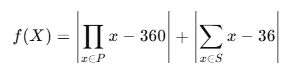

Un individu qui respecte exactement les contraintes aura un coût nul (0).

Plus l’écart est grand, plus le coût est élevé.

Le but est de minimiser ce coût



In [22]:
def evaluer_cout(individu):

    product_value = 1
    sum_value = 0
    for gene in individu:
        v = gene['value']
        if gene['group'] == 'product':
            product_value *= v
        elif gene['group'] == 'sum':
            sum_value += v
    cost = abs(product_value - 360) + abs(sum_value - 36)
    return cost

### Question 3.3 : Définir un opérateur de croisement entre individus.

Dans notre représentation, chaque individu est un matrice ligne de 10 colones (pour les valeurs 1 à 10), chacun contenant la couleur et l’affectation de groupe.

Ici on choit le point de coupure à 5

Construction de l’enfant :

Pour les indices 1 à 5, copier les gènes (couleur et groupe) du parent 1.

Pour les indices 6 à 10, copier les gènes du parent 2.

Vérification de la répartition :

Puisque la contrainte 5 cartes dans chaque groupe”doit être respectée, il peut arriver qu’après croisement, l’enfant n’ait pas exactement 5 cartes dans le groupe produit.

Pour réglé le probléme, si le nombre de cartes dans produit n’est pas égal à 5, on peut ajuster en choisissant aléatoirement autant de cartes que nécessaire dans le groupe en surplus pour les basculer vers l’autre groupe




In [14]:
def crossover(parent1, parent2):

    point_coupure = 5
    enfant = []


    for i in range(10):
        if i < point_coupure:
            gene = parent1[i].copy()
        else:
            gene = parent2[i].copy()
        enfant.append(gene)


    #correction si la répartition des groupes n'est pas respectée
    prod_count = sum(1 for gene in enfant if gene['group'] == 'product')
    if prod_count != 5:
        if prod_count > 5:
            #trop de cartes en 'product': on en change quelques-unes en 'sum'
            indices = [i for i, gene in enumerate(enfant) if gene['group'] == 'product']
            change = random.sample(indices, prod_count - 5)
            for i in change:


                enfant[i]['group'] = 'sum'

        else:
            #trop peu de cartes en 'product': on change quelques cartes 'sum' en 'product'
            indices = [i for i, gene in enumerate(enfant) if gene['group'] == 'sum']
            change = random.sample(indices, 5 - prod_count)
            for i in change:

                enfant[i]['group'] = 'product'
    return enfant


### Question 3.4 : Proposer un opérateur de mutation

Pour un gène donné, avec une petite probabilité ici 0?1, on change la couleur en choisissant une nouvelle couleur aléatoirement (différente actuelle).

Ici, la mutation doit conserver le nombre total de cartes dans chaque groupe (5 et 5).

on choisit deux indice de gene 1 situé dans produit et un autre dans somme et on échanger leur affectation de groupe.


In [19]:
def muter(individu, mutation_rate_color=0.1, mutation_rate_group=0.1):

    for gene in individu:
        if random.random() < mutation_rate_color:

            current_color = gene['color']
            new_colors = [c for c in COLORS if c != current_color]

            gene['color'] = random.choice(new_colors)

    if random.random() < mutation_rate_group:

        prod_indices = [i for i, gene in enumerate(individu) if gene['group'] == 'product']
        sum_indices = [i for i, gene in enumerate(individu) if gene['group'] == 'sum']

        if prod_indices and sum_indices:

            i = random.choice(prod_indices)
            j = random.choice(sum_indices)

            individu[i]['group'], individu[j]['group'] = individu[j]['group'], individu[i]['group']

    return individu

Code d'alorithme génétique

In [23]:
def tournois(population, fitnesses, k=2):

    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda x: x[1])
    return selected[0][0]


def select_parents(population, fitnesses):

    parent1 = tournois(population, fitnesses)
    parent2 = tournois(population, fitnesses)
    return parent1, parent2


def genetic_algorithm(pop_size=99, generations=5555):

    population = [create_individu() for _ in range(pop_size)]
    best = None
    best_cost = math.inf

    for gen in range(generations):
        fitnesses = [evaluer_cout(ind) for ind in population]

        for ind, cost in zip(population, fitnesses):
            if cost < best_cost:
                best = ind
                best_cost = cost

        if best_cost == 0:
            print(f"Solution trouvée à la génération {gen} avec un coût de {best_cost}.")
            return best

        new_population = []
        while len(new_population) < pop_size:
            parent1, parent2 = select_parents(population, fitnesses)
            enfant = crossover(parent1, parent2)
            enfant = muter(enfant)
            new_population.append(enfant)
        population = new_population


        print(f"Génération {gen}, meilleur coût jusqu'à présent: {best_cost}")

    print("Aucune solution parfaite n'a été trouvée.")
    return best


def print_individu(individu):

    prod_values = [gene['value'] for gene in individu if gene['group'] == 'product']
    sum_values = [gene['value'] for gene in individu if gene['group'] == 'sum']

    product_result = math.prod(prod_values)
    sum_result = sum(sum_values)

    print("Groupe 'product' :", prod_values, "Produit =", product_result)
    print("Groupe 'sum'     :", sum_values, "Somme =", sum_result)
    print("Détails de l'individu :")
    for gene in individu:
        print(f"Valeur : {gene['value']:2} | Couleur : {gene['color']} | Groupe : {gene['group']}")


best_solution = genetic_algorithm(pop_size=200, generations=5000)
print("\nmeilleure solution trouvée :")
print_individu(best_solution)

Génération 0, meilleur coût jusqu'à présent: 3
Génération 1, meilleur coût jusqu'à présent: 2
Solution trouvée à la génération 2 avec un coût de 0.

meilleure solution trouvée :
Groupe 'product' : [1, 3, 4, 5, 6] Produit = 360
Groupe 'sum'     : [2, 7, 8, 9, 10] Somme = 36
Détails de l'individu :
Valeur :  1 | Couleur : ♥ | Groupe : product
Valeur :  2 | Couleur : ♣ | Groupe : sum
Valeur :  3 | Couleur : ♠ | Groupe : product
Valeur :  4 | Couleur : ♥ | Groupe : product
Valeur :  5 | Couleur : ♠ | Groupe : product
Valeur :  6 | Couleur : ♦ | Groupe : product
Valeur :  7 | Couleur : ♣ | Groupe : sum
Valeur :  8 | Couleur : ♠ | Groupe : sum
Valeur :  9 | Couleur : ♠ | Groupe : sum
Valeur : 10 | Couleur : ♦ | Groupe : sum
